### Временные ряды. Стационарность.
Проанализируем ряды, сделаем их стационарными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto = pd.read_csv('/home/data/netology_ml/time_series/data/hw 1 (intro)/monthly-us-auto-registration-tho.csv', sep=';')
dow = pd.read_csv('/home/data/netology_ml/time_series/data/hw 1 (intro)/weekly-closings-of-the-dowjones-.csv')

In [3]:
auto.columns = ['Month','Auto_registration']
dow.columns = ['Week', 'Weekly_closings']

### Начнем с авто

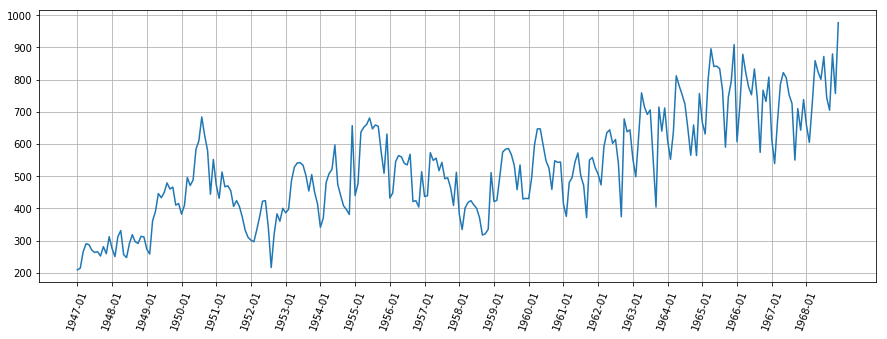

In [4]:
plt.figure(figsize=(15,5))
plt.plot(auto.Month ,auto.Auto_registration)
plt.xticks(range(0,len(auto.Month),12))
plt.xticks(rotation=70)
plt.grid()

Сразу бросаются в глаза тренд, сезонность и увеличение дисперсии, что говорит о том, что ряд не стационарен.

Проверим:

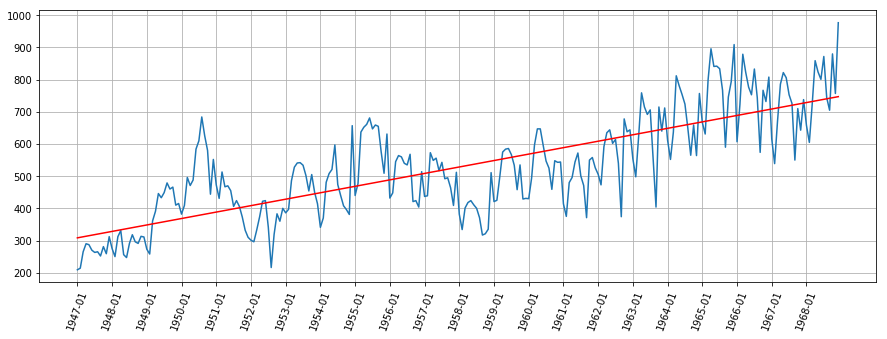

In [5]:
# Тренд

plt.figure(figsize=(15,5))
plt.plot(auto.Month ,auto.Auto_registration)
plt.xticks(range(0,len(auto.Month),12))
plt.xticks(rotation=70)
plt.grid()

m,b = np.polyfit(range(0,len(auto.Month)), auto.Auto_registration, 1) 
plt.plot(range(0,len(auto.Month)), m*range(0,len(auto.Month))+b, '-r') 

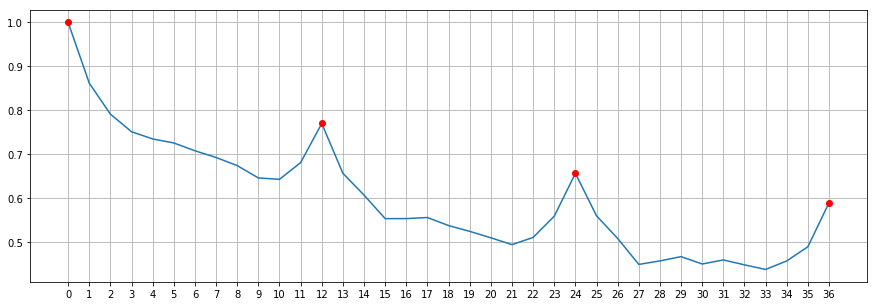

In [6]:
# Автокорреляция для разных лагов

y = []
for n in range(0,37):
    y.append(auto.Auto_registration.autocorr(0+n))
    
plt.figure(figsize=(15,5))
plt.plot(range(0,37),y)
plt.xticks(range(0,37))
plt.grid(which='both')
plt.plot([0,12,24,36],y[::12], 'or')

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
print('DF-test p-value is', adfuller(auto.Auto_registration)[1])

DF-test p-value is 0.6627329715655728


Ряд точно не стационарен. Попробуем привести его к стационарному виду.

Порядок такой:
1. Избавимся от дисперсии применив преобразование Бокса-Кокса
2. Избавимся от тренда и сезонности применив дифференцирование
3. Проверим результаты на графике, корреллограмме и проведем DF тест.
4. Будем повторять шаги, с разными параметрами, пока не добьемся стационарности.

Для удобства напишем функцию-визуализатор

In [9]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [10]:
def statvis(series, lags=None):
    print('DF-test p-value is', adfuller(series)[1])
    
    fig, ax = plt.subplots(3,1,figsize=(15,12))
    ax[0].plot(series)
    ax[0].grid()
    ax[0].set_title('Series')
    
    m,b = np.polyfit(range(0,len(series)), series, 1) 
    ax[0].plot(range(0,len(series)), m*range(0,len(series))+b, '-r') 
    
    smt.graphics.plot_acf(series, ax=ax[1], alpha=0.05, lags=lags)
    smt.graphics.plot_pacf(series, ax=ax[2], alpha=0.05, lags=lags)

In [11]:
from scipy.stats import boxcox

In [12]:
auto_s = auto.Auto_registration

DF-test p-value is 0.3127383436889914


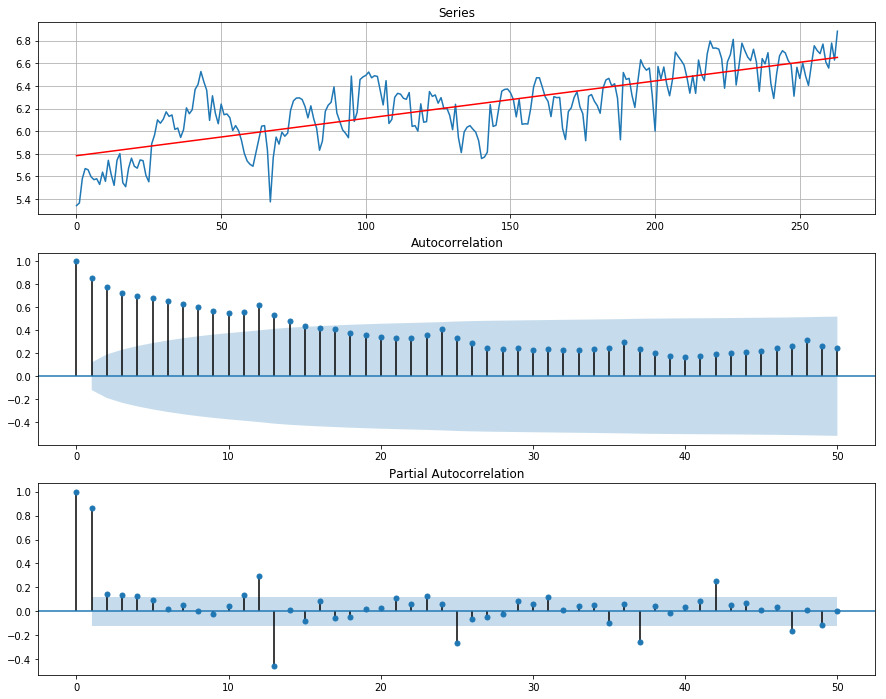

In [13]:
auto_s = boxcox(auto_s, 0)
statvis(auto_s, 50)

DF-test p-value is 0.000345671421978996


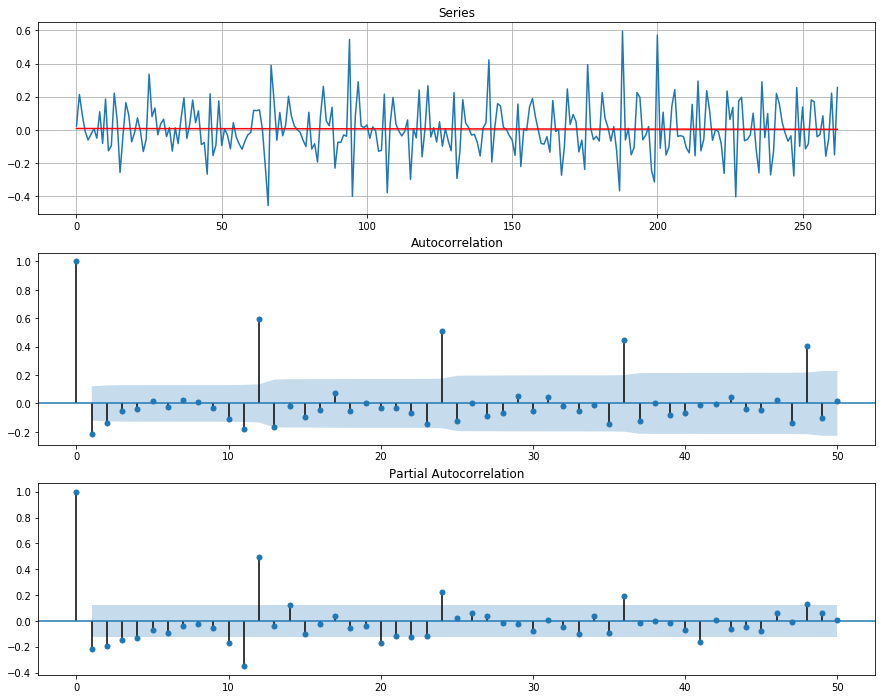

In [14]:
auto_s = np.diff(auto_s, 1)
statvis(auto_s, 50)

DF-test p-value is 0.0


/home/data/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


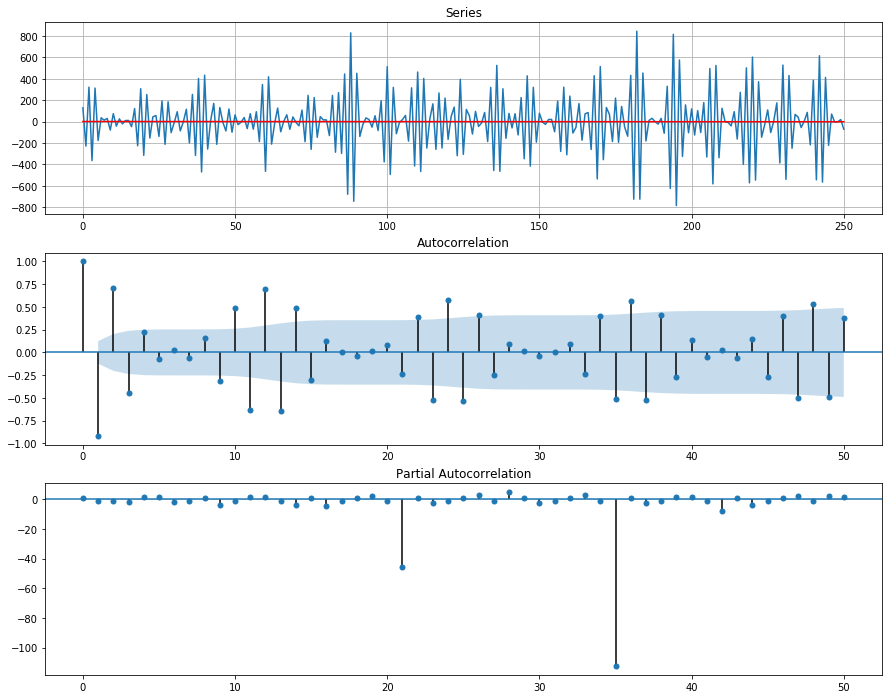

In [15]:
auto_s = np.diff(auto_s, 12)
statvis(auto_s, 50)

### Теперь индекс Доу-Джонса

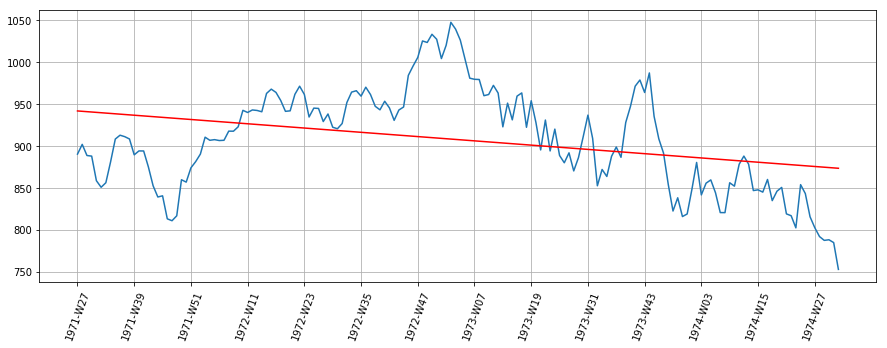

In [16]:
# Тренд

plt.figure(figsize=(15,5))
plt.plot(dow.Week ,dow.Weekly_closings)
plt.xticks(range(0,len(dow.Week),12))
plt.xticks(rotation=70)
plt.grid()

m,b = np.polyfit(range(0,len(dow.Week)), dow.Weekly_closings, 1) 
plt.plot(range(0,len(dow.Week)), m*range(0,len(dow.Weekly_closings))+b, '-r') 

Наблюдаю тренд, нужно проверять дальше

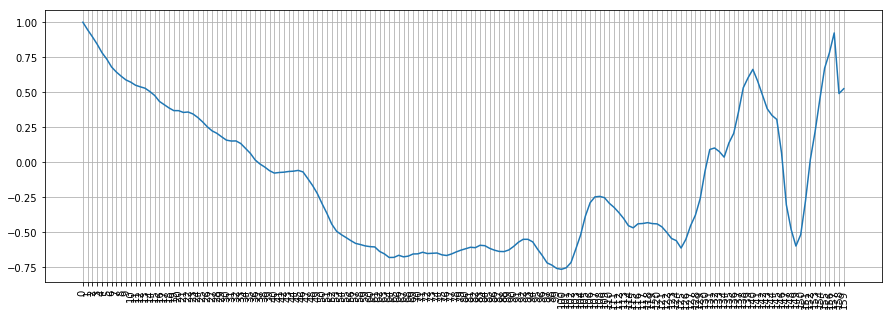

In [21]:
# Автокорреляция для разных лагов

y = []
for n in range(0,160):
    y.append(dow.Weekly_closings.autocorr(0+n))
    
plt.figure(figsize=(15,5))
plt.plot(range(0,160),y)
plt.xticks(range(0,160))
plt.xticks(rotation=90)
plt.grid(which='both')

Сезонности не наблюдаю, но для лагов 140 и 160 корреляция сильно подскакивает. Проверим "серьезными" тестами

DF-test p-value is 0.6224548515589732


/home/data/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


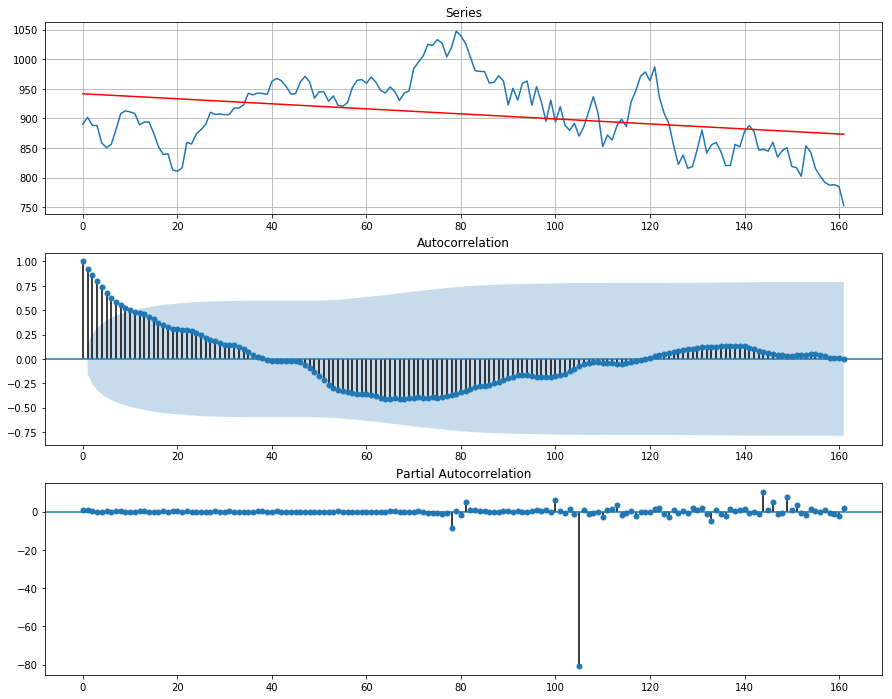

In [18]:
statvis(dow.Weekly_closings)

Ряд не проходит DF-тест. Приведем его к стационарному виду.

In [19]:
dow_s = dow.Weekly_closings

DF-test p-value is 2.4075864037416927e-24


/home/data/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


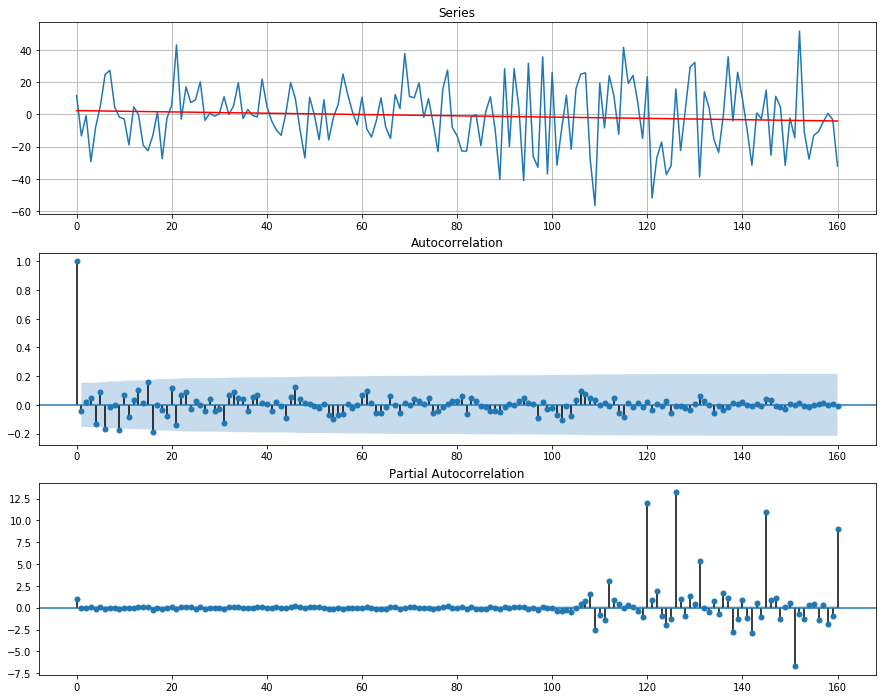

In [20]:
dow_s = np.diff(dow_s, 1)
statvis(dow_s)

Ряд стационарен.